In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("./car data.csv")


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df=df.drop(columns=["Car_ID"])

In [7]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df["Selling_Price"].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

<Axes: ylabel='Frequency'>

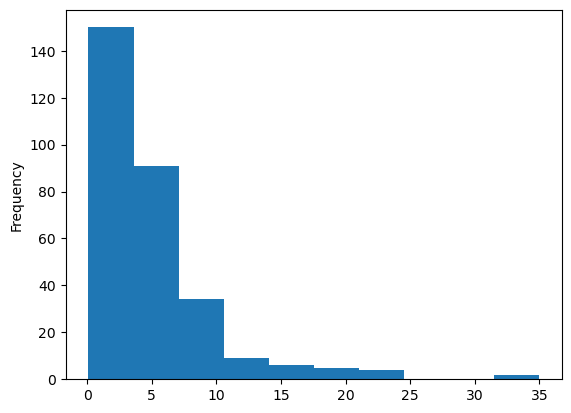

In [12]:
df["Selling_Price"].plot.hist()

<Axes: >

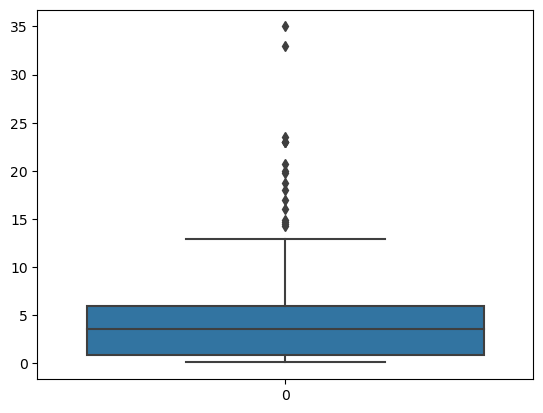

In [13]:
sns.boxplot(df["Selling_Price"])

In [14]:
q1 = df["Selling_Price"].quantile(0.25)
q3 = df["Selling_Price"].quantile(0.75)
IQR = q3-q1
IQR

5.1

In [15]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
upper_limit,lower_limit


(13.649999999999999, -6.749999999999999)

In [16]:
def imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [17]:
df["Selling_Price"]=df["Selling_Price"].apply(imputer)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [19]:
x = df.drop(columns=["Selling_Price"])
y = df["Selling_Price"]

In [20]:
categorial=x.select_dtypes(include=["object"])

In [22]:
x = pd.concat([x, dummy], axis=1)


In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming you have defined y_test previously
mean_absolute_error_value = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mean_absolute_error_value)
